# Regional variations in car prices

In [2]:
import basic_tools as bt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = bt.read_test_data()
df.head(10)

,bhp,desc,fuel,loc,miles,price,transmission
0,141,1 SERIES DIESEL HATCHBACK 118d SE 5dr Step Aut...,Diesel,South Wales,51187,9850,Automatic
1,121,1 SERIES HATCHBACK 116i [2.0] Sport 3dr (2010),Petrol,South Wales,14989,12450,Manual
2,141,BMW 1 SERIES 118d M Sport 2dr (2009),Diesel,Tyne And Wear,62434,9251,Manual
3,141,BMW 1 SERIES (E8X) 118D M SPORT ...,Diesel,West Sussex,52000,10250,Manual
4,NaN,1 SERIES HATCHBACK M135i 5dr [Nav] Step Auto (...,NA,Essex,NaN,31850,NA
5,141,1 SERIES DIESEL HATCHBACK 118d Sport 5dr (2015),Diesel,Essex,4417,18450,Manual
6,174,BMW 1 SERIES 120D SE ...,Diesel,Aberdeenshire,72000,7000,Manual
7,114,1 SERIES DIESEL HATCHBACK 116d Sport 5dr (2015),Diesel,Nottinghamshire,3871,18850,Manual
8,141,1 SERIES DIESEL HATCHBACK 118d M Sport 5dr (2014),Diesel,West Midlands,14990,19450,Manual
9,141,1 SERIES CONVERTIBLE SPECIAL EDITIONS 118d Spo...,Diesel,Berkshire,52648,16850,Manual


In [6]:
import matplotlib as mpl
import shapefile as sf
import glob

In [8]:
shpFilePath = glob.glob("/home/greg/ga7g08.github.io//data_sets/*shp")[0]

map_f = sf.Reader(shpFilePath)
county_metadata = map_f.records()
county_shapes = map_f.shapes()

In [11]:
np.array(county_metadata)[:, 1]

array(['Buckinghamshire', 'Cambridgeshire', 'Cumbria', 'Derbyshire',
       'Devon', 'Dorset', 'East Sussex', 'Essex', 'Gloucestershire',
       'Hampshire', 'Hertfordshire', 'Kent', 'Lancashire',
       'Leicestershire', 'Lincolnshire', 'Norfolk', 'Northamptonshire',
       'North Yorkshire', 'Nottinghamshire', 'Oxfordshire', 'Somerset',
       'Staffordshire', 'Suffolk', 'Surrey', 'Warwickshire', 'West Sussex',
       'Worcestershire', 'Greater Manchester', 'Merseyside',
       'South Yorkshire', 'Tyne and Wear', 'West Midlands',
       'West Yorkshire', 'Outer London', 'Inner London'], 
      dtype='|S18')

In [19]:
a = np.array(county_metadata)[:, 1]
b = df['loc'].values

for item in a:
    matches = b[b==item]
    if len(matches) > 0:
        print matches[0], len(matches)

Buckinghamshire 7
Cambridgeshire 10
Cumbria 1
Derbyshire 19
Devon 21
Dorset 13
East Sussex 1
Essex 20
Gloucestershire 4
Hampshire 11
Hertfordshire 8
Kent 6
Lancashire 8
Leicestershire 15
Lincolnshire 7
Norfolk 14
Northamptonshire 13
North Yorkshire 10
Nottinghamshire 3
Oxfordshire 4
Somerset 6
Staffordshire 7
Suffolk 4
Surrey 10
Warwickshire 17
West Sussex 9
Worcestershire 25
Greater Manchester 1
Merseyside 5
South Yorkshire 30
West Midlands 27
West Yorkshire 35


In [23]:
locs = []
mean = []
for item in a:
    matches = b[b==item]
    if len(matches) > 0:
        locs.append(item)
        mean.append(df[df['loc'] == item]['price'].mean())

In [49]:
patches = []
colors = []
for s, m in zip(county_shapes, county_metadata):
    try:
        idx = locs.index(m[1])
        color = mean[idx]
    except ValueError:
        color= 0
        
    colors.append(color)    
    poly = mpl.patches.Polygon(s.points)
    patches.append(poly)

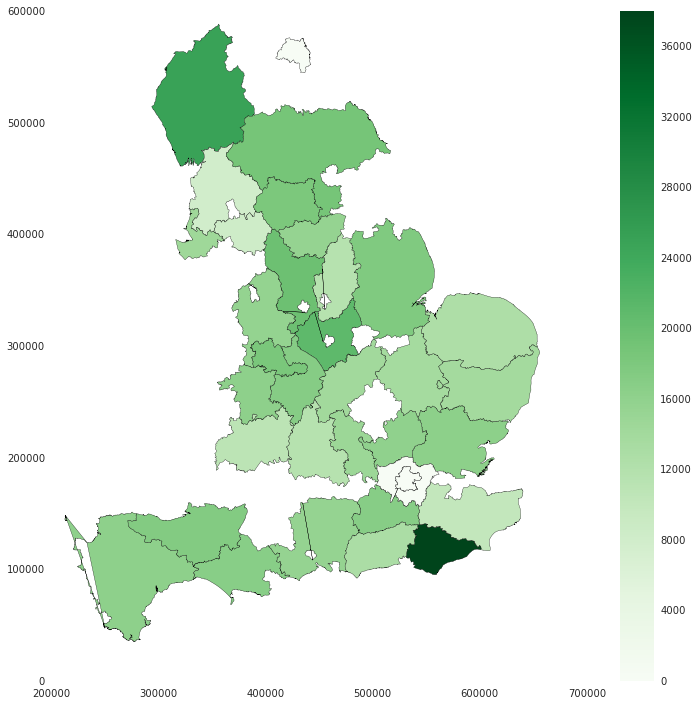

In [50]:
fig, ax = plt.subplots(figsize=(12, 12))
norm = mpl.colors.Normalize(vmin=min(mean), vmax=max(mean))
colormap = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)

p = mpl.collections.PatchCollection(patches, cmap=plt.cm.Greens)
p.set_array(np.array(colors))
ax.add_collection(p)

ax.autoscale()
plt.colorbar(p)
plt.show()